In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [11]:
# Read the Excel file
data = pd.read_excel('Dataset 9 bus.xlsx')

In [12]:
# Split data into features and target variable
X = data[['P2','P3','P4','P5','P6','P7','P8','P9','Q2','Q4','Q5','Q6','Q7','Q9','V1','V3','V8']].values
y = data[['Delta2','Delta3','Delta4','Delta5','Delta6','Delta7','Delta8','Delta9','P1','Q1','Q3','Q8','V2','V4','V5','V6','V7','V9']].values

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
# Build the ANN model
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train.shape[1]))  # Output layer with the same number of nodes as the number of target variables

In [15]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

In [16]:
from datetime import datetime

# record current timestamp
start = datetime.now()

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)


# record loop end timestamp
end = datetime.now()

# find difference loop start and end time and display
td = (end - start).total_seconds() * 10**3
print(f"The time of execution of above program is : {td:.03f}ms")


Epoch 1/100


11/11 [==============================] - 1s 3ms/step - loss: 141.7000
Epoch 2/100
11/11 [==============================] - 0s 3ms/step - loss: 134.4705
Epoch 3/100
11/11 [==============================] - 0s 3ms/step - loss: 119.1281
Epoch 4/100
11/11 [==============================] - 0s 3ms/step - loss: 88.7168
Epoch 5/100
11/11 [==============================] - 0s 3ms/step - loss: 48.7130
Epoch 6/100
11/11 [==============================] - 0s 3ms/step - loss: 22.1993
Epoch 7/100
11/11 [==============================] - 0s 3ms/step - loss: 7.7938
Epoch 8/100
11/11 [==============================] - 0s 3ms/step - loss: 2.4569
Epoch 9/100
11/11 [==============================] - 0s 3ms/step - loss: 0.7968
Epoch 10/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5214
Epoch 11/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4627
Epoch 12/100
11/11 [==============================] - 0s 3ms/step - loss: 0.3928
Epoch 13/100
11/11 [====================

In [17]:
# Evaluate the model on the test set
mse = model.evaluate(X_test, y_test)
print(f'Mean Squared Error (MSE): {mse}')

5/5 [==============================] - 0s 2ms/step - loss: 0.0480
Mean Squared Error (MSE): 0.04800190404057503


In [18]:
from datetime import datetime

# record current timestamp
start = datetime.now()
# Make predictions
predictions = model.predict(X_test_scaled)

# record loop end timestamp
end = datetime.now()

# find difference loop start and end time and display
td = (end - start).total_seconds() * 10**3
print(f"The time of execution of above program is : {td:.03f}ms")

5/5 [==============================] - 0s 1ms/step
The time of execution of above program is : 162.565ms


In [19]:
result = pd.DataFrame(predictions)

In [20]:
y_pred = predictions

In [21]:
result = pd.DataFrame(y_pred)
testset = pd.DataFrame(y_test)

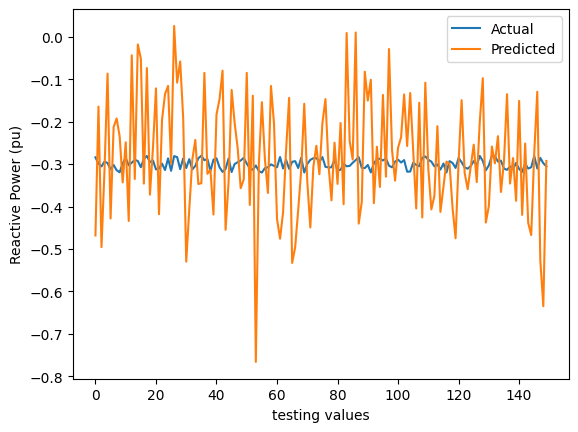

In [22]:
column5 = testset[11]
column6 = result[11]
# plot the data
plt.plot(column5, label='Actual')
plt.plot(column6, label='Predicted')
plt.legend()
plt.xlabel('testing values')
plt.ylabel('Reactive Power (pu)')
#plt.title('Hello')
plt.savefig('OLS Q3 9 bus.png', dpi = 600)
# plt.savefig('plot.pdf')
plt.show()

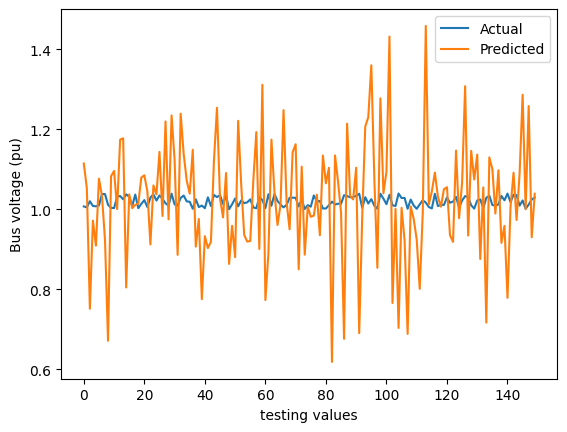

In [15]:
column5 = testset[13]
column6 = result[13]
# plot the data
plt.plot(column5, label='Actual')
plt.plot(column6, label='Predicted')
plt.legend()
plt.xlabel('testing values')
plt.ylabel('Bus voltage (pu)')
#plt.title('Hello')
plt.savefig('OLS V2 9 bus.png', dpi = 600)
# plt.savefig('plot.pdf')
plt.show()

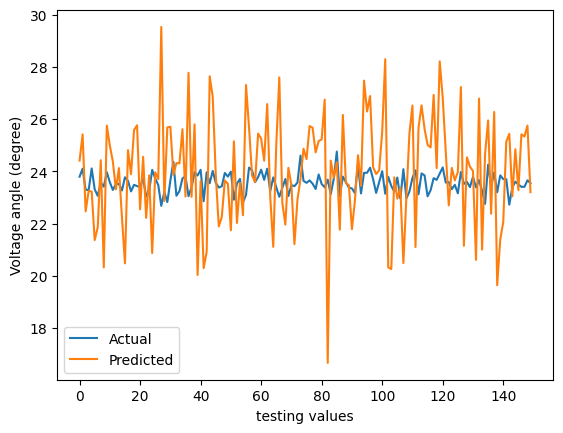

In [16]:
column5 = testset[0]
column6 = result[0]
# plot the data
plt.plot(column5, label='Actual')
plt.plot(column6, label='Predicted')
plt.legend()
plt.xlabel('testing values')
plt.ylabel('Voltage angle (degree)')
#plt.title('Hello')
# plt.savefig('OLS Delta 9 bus.png', dpi = 600)
# plt.savefig('plot.pdf')
plt.show()